# Transformação de imagens

Verificando versão instalada do OpenCV

In [2]:
import cv2
print(cv2.__version__)

import numpy as np

from matplotlib import pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

plt.style.use('seaborn')

3.4.3


## Translação

Carregando uma imagem previamente existente

In [4]:
image = cv2.imread("imagens/robot.jpg")

cv2.imshow("Robot", image)
cv2.waitKey()
cv2.destroyAllWindows()

Aplicando translação, sempre em paralelo nos eixos x e y. Neste caso utilizando valores positivos.

In [5]:
height, width = image.shape[:2]
new_height, new_width = height/4, width/4

T = np.float32([[1, 0, new_width],[0, 1, new_height]])

print(T)

image_translation = cv2.warpAffine(image, T, (width, height))

cv2.imshow("Robot Translation", image_translation)
cv2.waitKey()
cv2.destroyAllWindows()

[[  1.    0.  134.5]
 [  0.    1.  134.5]]


Aplicando translação no sentido inverso, utilizando valores negativos.

In [ ]:
T = np.float32([[1, 0, -new_width],[0, 1, -new_height]])

print(T)

image_translation = cv2.warpAffine(image, T, (width, height))

cv2.imshow("Robot Translation", image_translation)
cv2.waitKey()
cv2.destroyAllWindows()

## Rotação

Carregando uma imagem previamente existente

In [7]:
image = cv2.imread("imagens/robot.jpg")

cv2.imshow("Robot", image)
cv2.waitKey()
cv2.destroyAllWindows()

Aplicando matriz de rotação e incluindo na transformação afim.

In [11]:
height, width = image.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, 1)
image_rotated = cv2.warpAffine(image, rotation_matrix, (width, height))

print(rotation_matrix)

cv2.imshow("Robot Rotation", image_rotated)
cv2.waitKey()
cv2.destroyAllWindows()

[[ 6.12323400e-17  1.00000000e+00 -5.68434189e-14]
 [-1.00000000e+00  6.12323400e-17  5.38000000e+02]]


Utilizando transposição de imagens. Método mais simples para rotações de ângulos retos.

In [17]:
image_transposed = cv2.transpose(image)

cv2.imshow("Robot Rotation Transpose", image_transposed)
cv2.waitKey()
cv2.destroyAllWindows()

## Redimensionamento e Interpolação

O redimensionamento de imagens pode utilizar uma série de interpolações que servem para cobrir os pixels que são expandidos. Cada tipo de interpolação traz aspectos de maior nitidez e velocidade de processamento.

Carregando uma imagem previamente existente

In [18]:
image = cv2.imread("imagens/coffee_small.jpg")

cv2.imshow("Coffee", image)
cv2.waitKey()
cv2.destroyAllWindows()

In [20]:
factor_x=5
factor_y=5

image_scaled_linear = cv2.resize(image, None, fx=factor_x, fy=factor_y)
image_scaled_cubic = cv2.resize(image, None, fx=factor_x, fy=factor_y, interpolation=cv2.INTER_CUBIC)
image_scaled_area = cv2.resize(image, None, fx=factor_x, fy=factor_y, interpolation=cv2.INTER_AREA)
image_scaled_lanczo = cv2.resize(image, None, fx=factor_x, fy=factor_y, interpolation=cv2.INTER_LANCZOS4)

cv2.imshow("Coffee Scaled Linear", image_scaled_linear)
cv2.imshow("Coffee Scaled Cubic", image_scaled_cubic)
cv2.imshow("Coffee Scaled Inter Area", image_scaled_area)
cv2.imshow("Coffee Scaled Lanczo", image_scaled_lanczo)

cv2.waitKey()
cv2.destroyAllWindows()

In [21]:
new_scale = (200,200)

image_scaled_linear = cv2.resize(image, new_scale)
image_scaled_cubic = cv2.resize(image, new_scale, interpolation=cv2.INTER_CUBIC)
image_scaled_area = cv2.resize(image, new_scale, interpolation=cv2.INTER_AREA)
image_scaled_lanczo = cv2.resize(image, new_scale, interpolation=cv2.INTER_LANCZOS4)

cv2.imshow("Coffee Scaled Linear", image_scaled_linear)
cv2.imshow("Coffee Scaled Cubic", image_scaled_cubic)
cv2.imshow("Coffee Scaled Inter Area", image_scaled_area)
cv2.imshow("Coffee Scaled Lanczo", image_scaled_lanczo)

cv2.waitKey()
cv2.destroyAllWindows()

Utilizando Image Pyramids para redimensionar imagens.

In [30]:
image = cv2.imread("imagens/robot.jpg")

image_small = cv2.pyrDown(image)
image_smaller = cv2.pyrDown(image_small)

cv2.imshow("Robot", image)
cv2.imshow("Robot Small", image_small)
cv2.imshow("Robot Smaller", image_smaller)
cv2.waitKey()
cv2.destroyAllWindows()

## Transformação Homográfica (Não-Afim)

In [22]:
image = cv2.imread("imagens/portal.jpg")

cv2.imshow("Portal", image)
cv2.waitKey()
cv2.destroyAllWindows()

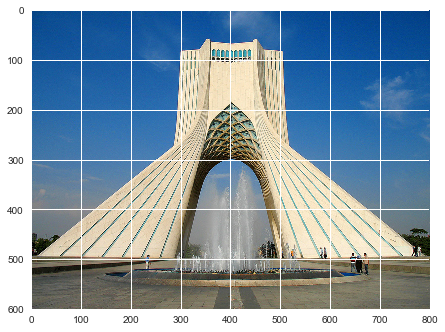

In [23]:
image_plt = mpimg.imread("imagens/portal.jpg")
plt.imshow(image_plt)
plt.show()

600 800


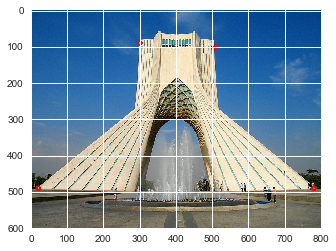

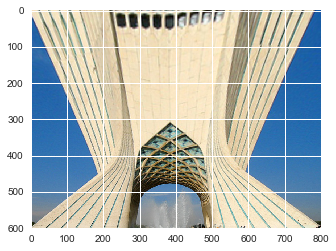

In [28]:
height, width = image.shape[:2]

image_marker = image.copy()

print(height, width)

pts1_marker = np.float32([[300,90],[510,100],[20,490],[780,490]])
pts2_strech = np.float32([[0,0],[800,0],[0,600],[800,600]])

color = (0, 0, 255)
cv2.circle(image_marker, (300,90), 5, color, 3)
cv2.circle(image_marker, (510,100), 5, color, 3)
cv2.circle(image_marker, (20,490), 5, color, 3)
cv2.circle(image_marker, (780,490), 5, color, 3)

cv2.imwrite("portal_processing.jpg", image_marker)

image_plt = mpimg.imread("portal_processing.jpg")
plt.imshow(image_plt)
plt.show()

#cv2.imshow("Marcacoes", image_marker)

M = cv2.getPerspectiveTransform(pts1_marker, pts2_strech)
dst = cv2.warpPerspective(image,M,(800,600))

cv2.imwrite("portal_perspective.jpg", dst)

image_plt = mpimg.imread("portal_perspective.jpg")
plt.imshow(image_plt)
plt.show()

#cv2.imshow("Portal Transformed", dst)
#cv2.waitKey()
#cv2.destroyAllWindows()

## Recortando uma imagem

No OpenCV não existe uma função própria para recortar segmentos de uma imagem. Por outro lado, conseguimos fazer esta tarefa fácilmente aplicando diretamente na matriz da imagem as alterações.

In [37]:
image = cv2.imread("imagens/robot.jpg")
height, width = image.shape[:2]

cv2.imshow("Robot", image)
cv2.waitKey()
cv2.destroyAllWindows()

In [38]:
start_row, start_col = int(height*0.3), int(width*0.3)
end_row, end_col =  int(height*0.6), int(width*0.6)

image_crop = image[start_row:end_row, start_col:end_col]

cv2.imshow("Robot Cropped", image_crop)
cv2.waitKey()
cv2.destroyAllWindows()

## Alterando brilho (nitidez) de uma imagem

In [40]:
image = cv2.imread("imagens/robot.jpg")
image_shape = image.shape

cv2.imshow("Robot", image)
cv2.waitKey()
cv2.destroyAllWindows()

In [46]:
bright_M = np.ones(image_shape, np.uint8) * 100
image_bright = cv2.add(image, bright_M)

cv2.imshow("Robot Bright", image_bright)
cv2.waitKey()

image_dark = cv2.subtract(image, bright_M)

cv2.imshow("Robot Dark", image_dark)
cv2.waitKey()
cv2.destroyAllWindows()

## Operações lógicas

As operações lógicas ou bitwise operations são operações do tipo and, or, xor e not. São utilizadas na composição de 2 imagens, criar máscaras e intersecções.

In [7]:
rectangle = np.zeros((300,300), np.uint8)
cv2.rectangle(rectangle, (50,50), (200,200), 255, -2)

cv2.imshow("Retangule", rectangle)
cv2.waitKey()
cv2.destroyAllWindows()

In [8]:
circle = np.zeros((300,300), np.uint8)
cv2.circle(circle,(180,150), 100, 255, -2)

cv2.imshow("Circle", circle)
cv2.waitKey()
cv2.destroyAllWindows()

In [9]:
and_operation = cv2.bitwise_and(rectangle, circle)

cv2.imshow("And Operation", and_operation)
cv2.waitKey()
cv2.destroyAllWindows()

In [92]:
or_operation = cv2.bitwise_or(rectangle, circle)

cv2.imshow("Or Operation", or_operation)
cv2.waitKey()
cv2.destroyAllWindows()

In [93]:
or_operation = cv2.bitwise_xor(rectangle, circle)

cv2.imshow("Xor Operation", or_operation)
cv2.waitKey()
cv2.destroyAllWindows()

In [100]:
not_operation = cv2.bitwise_not(circle)

cv2.imshow("Not Operation", not_operation)
cv2.waitKey()
cv2.destroyAllWindows()

## Suavização de imagens

A suavização de imagens (ou Blurring) auxilia no processo de remoção de ruídos e diminuição de detalhes de uma imagem.

In [118]:
image = cv2.imread("imagens/old-person.jpg")

cv2.imshow("Old Person", image)
cv2.waitKey()

113

In [119]:
kernel_3 = np.ones((3,3), np.float32)/9
image_blur = cv2.filter2D(image, -1, kernel_3)

cv2.imshow("Old Person Blur", image_blur)
cv2.waitKey()

113

In [120]:
kernel_11 = np.ones((7,7), np.float32)/49
image_blur_2 = cv2.filter2D(image, -1, kernel_11)

cv2.imshow("Old Person Blur 2", image_blur_2)
cv2.waitKey()
cv2.destroyAllWindows()

Outras operações de suavização com filtros especializados.

In [132]:
image = cv2.imread("imagens/old-person.jpg")

cv2.imshow("Old Person", image)
cv2.waitKey()

image_blur = cv2.blur(image, (5,5))
cv2.imshow("Old Person Blur", image_blur)
cv2.waitKey()

image_blur = cv2.GaussianBlur(image, (7,7), 0)
cv2.imshow("Old Person Gaussian Blur", image_blur)
cv2.waitKey()

image_blur = cv2.medianBlur(image, 5)
cv2.imshow("Old Person Median Blur", image_blur)
cv2.waitKey()

image_blur = cv2.bilateralFilter(image, 9, 75, 75)
cv2.imshow("Old Person Bilateral Blur", image_blur)
cv2.waitKey()

cv2.destroyAllWindows()